# Machine Learning Coursework

In [1]:
# libraries
import pandas as pd
from pandas import plotting
from sklearn import metrics#to calculate rootmean square
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#DataVisualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning Libraries
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pydotplus
!apt-get install graphviz

"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## 1)Exploratory Data Analysis

A) Data Preview

In [2]:
dry =pd.read_excel('Dry_Bean_Dataset.xlsx')
dry.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
le = preprocessing.LabelEncoder()
columns = ["Class"]

for col in columns:
    dry[col] = le.fit_transform(dry[col])
    print(le.classes_)
      
dry.head()

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [4]:
# define the dictionary
diccionario = {0: 'BARBUNYA', 1: 'BOMBAY', 2: 'CALI', 3: 'DERMASON', 4: 'HOROZ', 5: 'SEKER', 6: 'SIRA'}

# Create a dataframe from the dictionary
df_clases = pd.DataFrame.from_dict(diccionario, orient='index', columns=['clases'])

# "Add a column of numbers to the dataframe
df_clases['Class'] = df_clases.index

print(df_clases)

     clases  Class
0  BARBUNYA      0
1    BOMBAY      1
2      CALI      2
3  DERMASON      3
4     HOROZ      4
5     SEKER      5
6      SIRA      6


In [5]:
df= pd.merge(dry, df_clases, on='Class')

print(df)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [6]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int32  
 17  clases      

In [7]:
df.size 

244998

In [8]:
df.shape

(13611, 18)

In [9]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,3.532657
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,1.828709
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,2.000000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,3.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,5.000000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


In [10]:
df.isna().sum() #checking if there are missing values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
clases             0
dtype: int64

In [11]:
df_copy=df.copy()

In [12]:
#check duplicated
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13606    False
13607    False
13608    False
13609    False
13610    False
Length: 13611, dtype: bool

In [13]:
# lets check summery for all the Classes

print("Average Area : {0:.2f}".format(df['Area'].mean()))
print("Average Perimeter : {0:.2f}".format(df['Perimeter'].mean()))
print("Average MajorAxisLength : {0:.2f}".format(df['MajorAxisLength'].mean()))
print("Average MinorAxisLength: {0:.2f}".format(df['MinorAxisLength'].mean()))
print("Average AspectRation : {0:.2f}".format(df['AspectRation'].mean()))
print("Average Eccentricity : {0:.2f}".format(df['Eccentricity'].mean()))
print("Average ConvexArea: {0:.2f}".format(df['ConvexArea'].mean()))
print("Average EquivDiameter: {0:.2f}".format(df['EquivDiameter'].mean()))
print("Average Extent : {0:.2f}".format(df['Extent'].mean()))
print("Average Solidity : {0:.2f}".format(df['Solidity'].mean()))
print("Average roundness: {0:.2f}".format(df['roundness'].mean()))
print("Average Compactness : {0:.2f}".format(df['Compactness'].mean()))
print("Average ShapeFactor1: {0:.2f}".format(df['ShapeFactor1'].mean()))
print("Average ShapeFactor2: {0:.2f}".format(df['ShapeFactor2'].mean()))
print("Average ShapeFactor3 : {0:.2f}".format(df['ShapeFactor3'].mean()))
print("Average ShapeFactor4 : {0:.2f}".format(df['ShapeFactor4'].mean()))

Average Area : 53048.28
Average Perimeter : 855.28
Average MajorAxisLength : 320.14
Average MinorAxisLength: 202.27
Average AspectRation : 1.58
Average Eccentricity : 0.75
Average ConvexArea: 53768.20
Average EquivDiameter: 253.06
Average Extent : 0.75
Average Solidity : 0.99
Average roundness: 0.87
Average Compactness : 0.80
Average ShapeFactor1: 0.01
Average ShapeFactor2: 0.00
Average ShapeFactor3 : 0.64
Average ShapeFactor4 : 1.00


B)Cleaning the data

In [14]:
df.drop_duplicates(inplace=True)

c) Data Visualization

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
Name: Class, dtype: int64


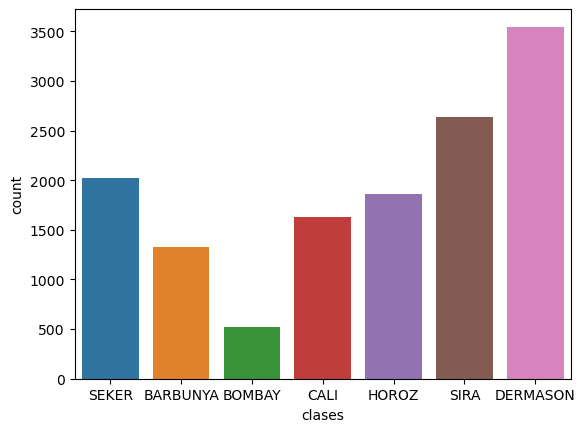

In [15]:
print(dry['Class'].value_counts())
_=sns.countplot(x='clases', data=df)

In [16]:
#Columns name definition
df_col = df.columns
df_col

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class', 'clases'],
      dtype='object')

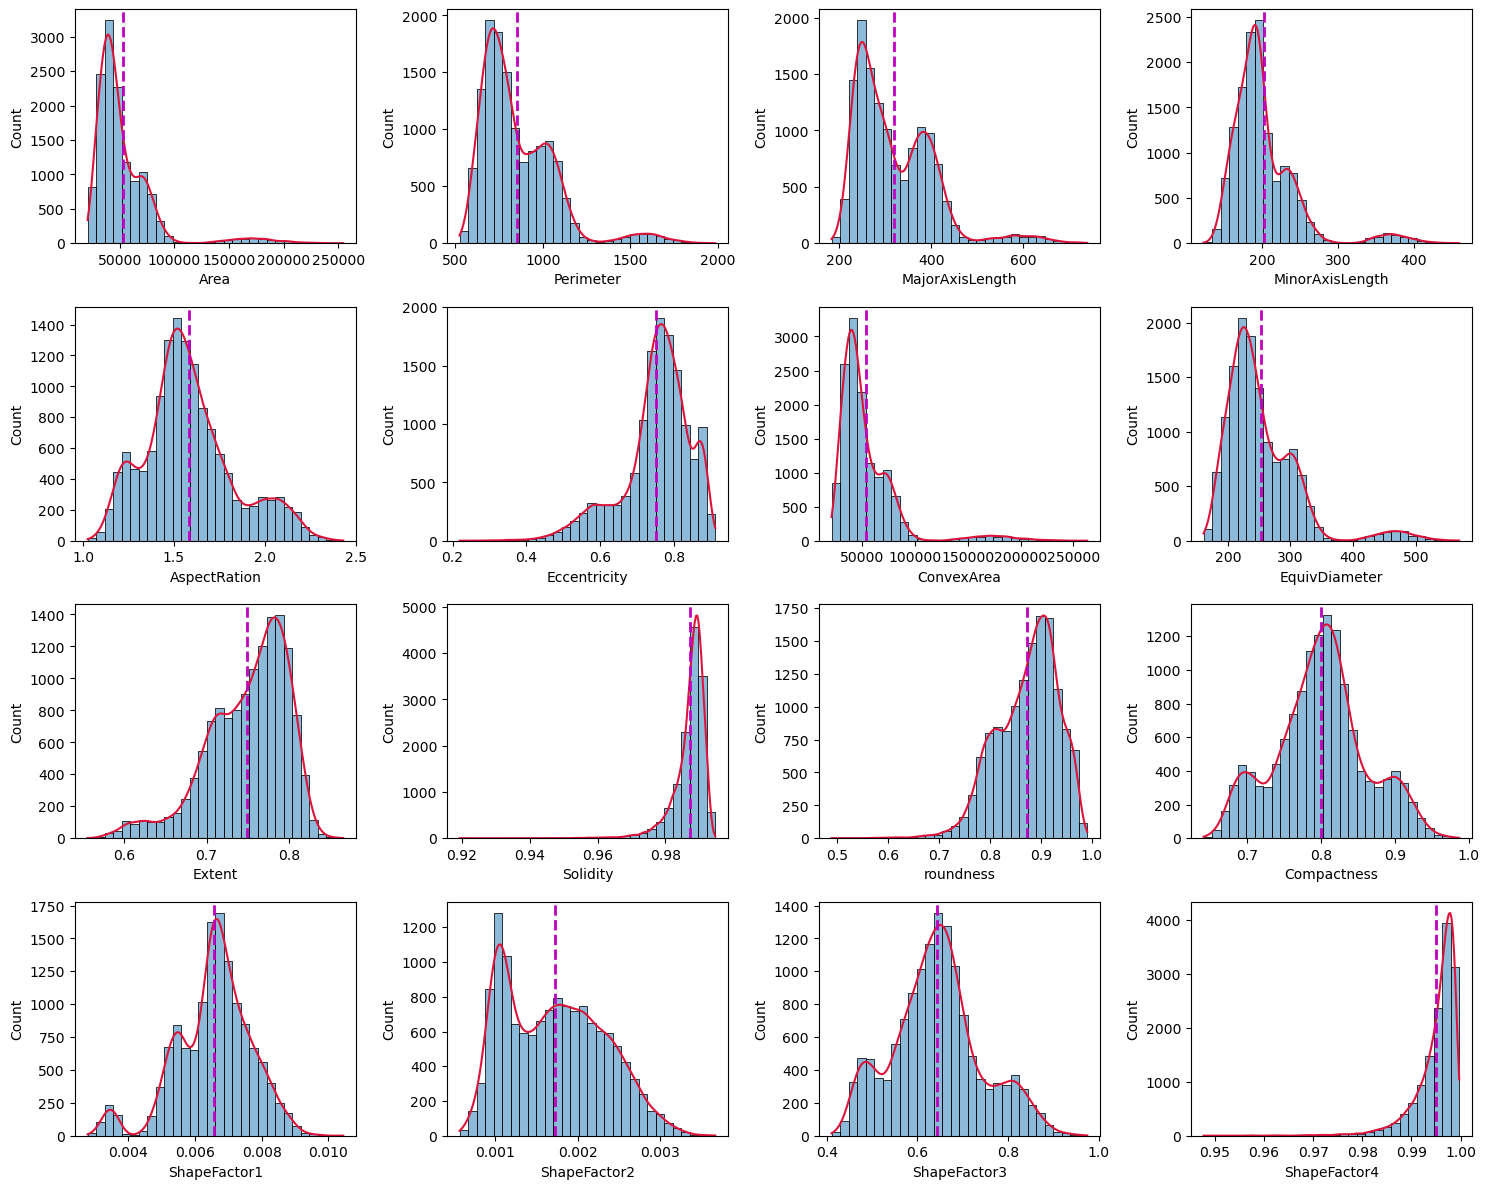

In [17]:
#This code is creating a 4x4 grid of subplots using the subplots() function from the matplotlib.pyplot library, with a total
#figure size of 15x12. Then, for each of the columns in the DataFrame dry that are numeric (excluding the 'Class' column)

Numeric_cols = dry.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(dry[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=dry[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

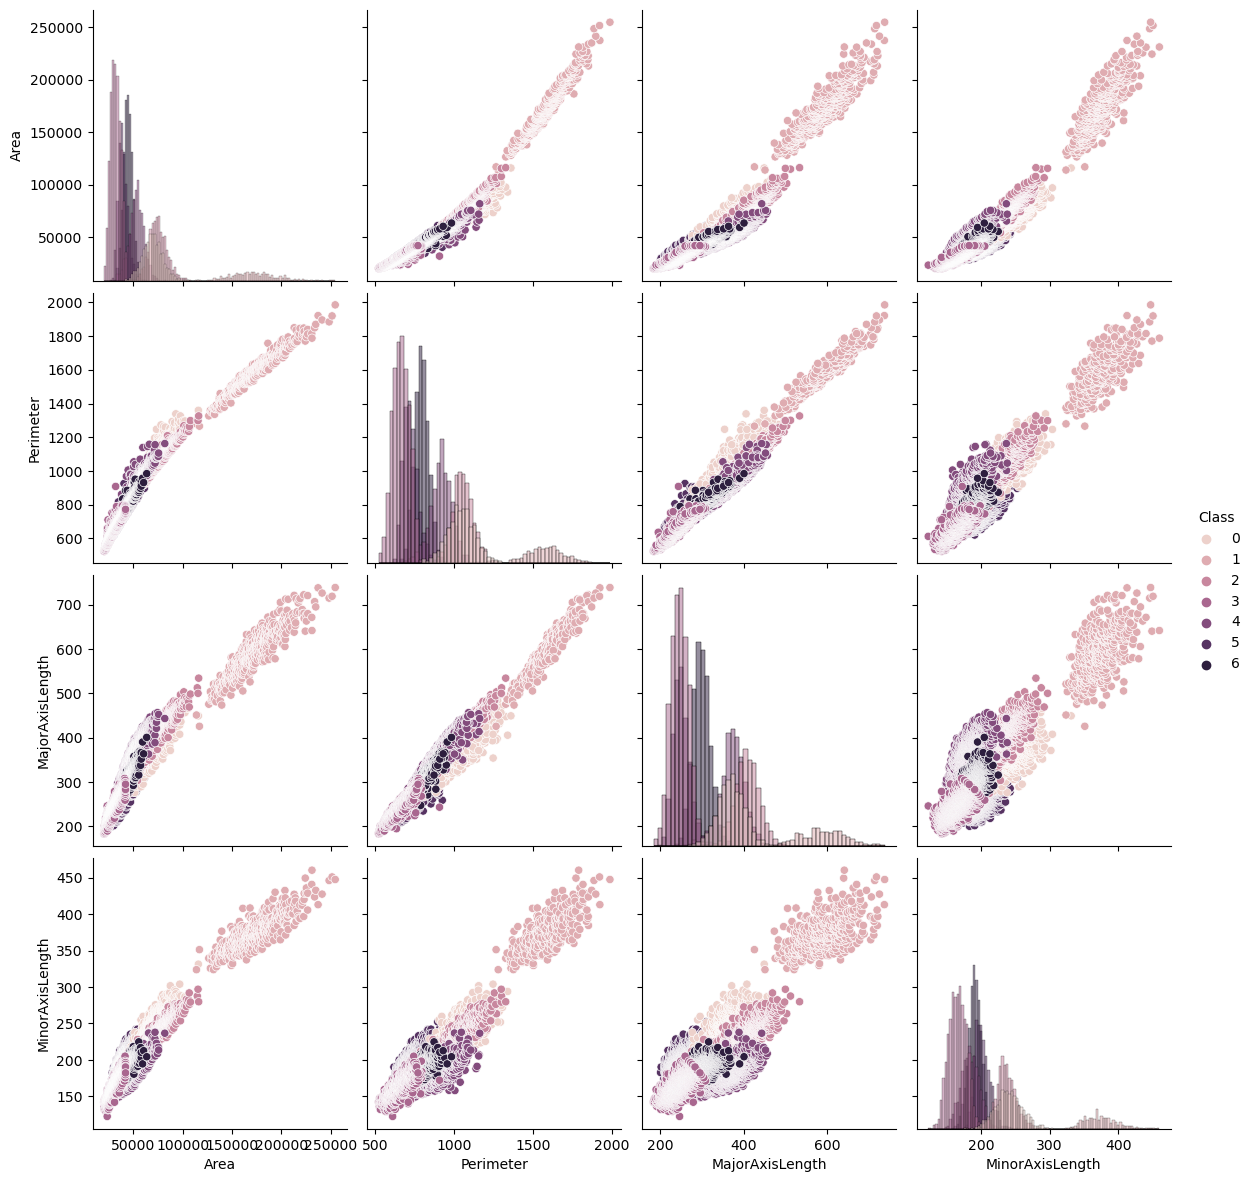

In [18]:
sns.pairplot(dry.drop(['AspectRation','Eccentricity','ConvexArea',
    'EquivDiameter',
    'Extent',
    'Solidity',
    'roundness',
    'Compactness',
    'ShapeFactor1',
    'ShapeFactor2',
    'ShapeFactor3',
    'ShapeFactor4'], axis=1), hue='Class', height=3, diag_kind='hist')

<AxesSubplot:>

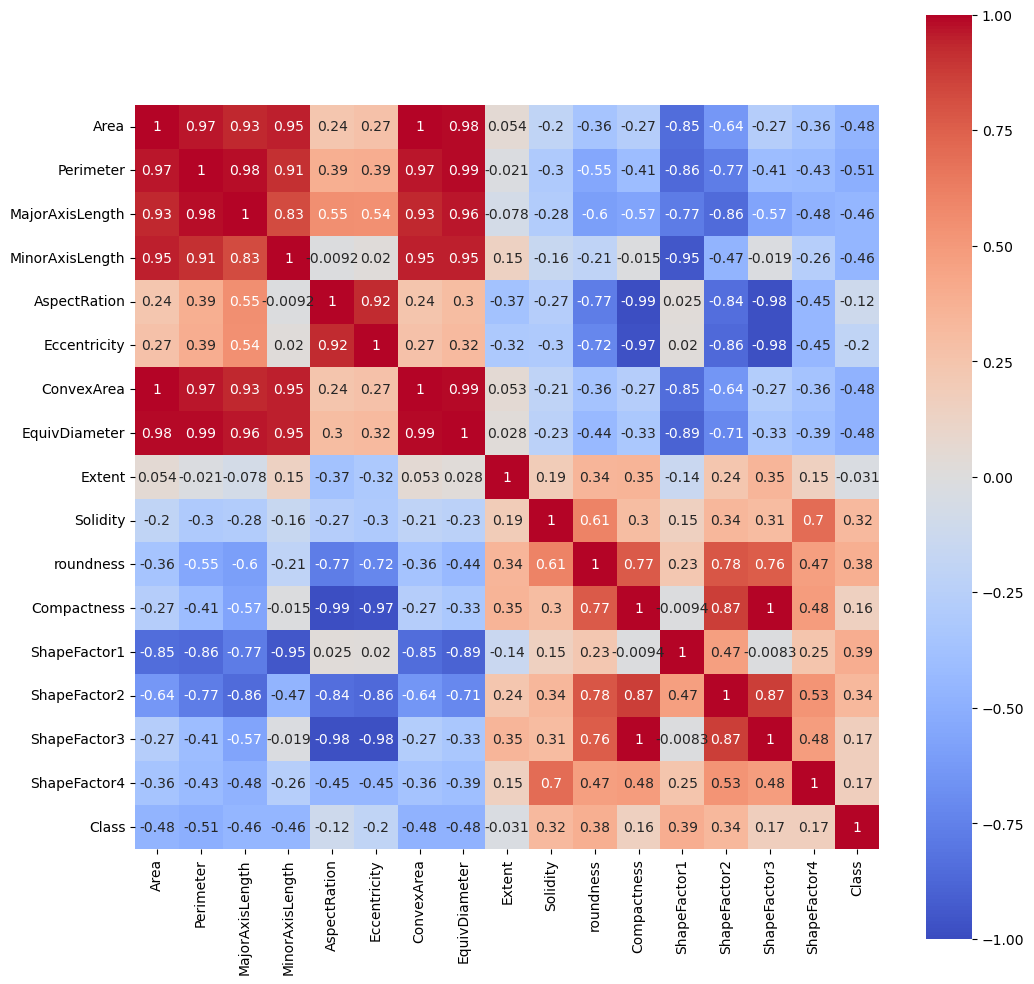

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(dry.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

Defining X and y

In [20]:
X = dry[[
    'Area',
    'Perimeter',
    'MajorAxisLength',
    'MinorAxisLength',
    'AspectRation',
    'Eccentricity',
    'ConvexArea',
    'EquivDiameter',
    'Extent',
    'Solidity',
    'roundness',
    'Compactness',
    'ShapeFactor1',
    'ShapeFactor2',
    'ShapeFactor3',
    'ShapeFactor4']].values
y = dry[['Class']]

In [21]:
# If the distribution is symmetric, then the skewness is 0. If the tail of the distribution extends to the right, 
#then the distribution is considered positively skewed and the skewness is positive. 
#If the tail of the distribution extends to the left, 
#then the distribution is considered negatively skewed and the skewness is negative
df.skew().sort_values(ascending=True)

C:\Users\ptrau\AppData\Local\Temp\ipykernel_23124\3356257674.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=True)


ShapeFactor4      -2.760125
Solidity          -2.546877
Eccentricity      -1.064932
Extent            -0.895655
roundness         -0.648725
ShapeFactor1      -0.530427
Class             -0.319689
Compactness        0.036309
ShapeFactor3       0.242767
ShapeFactor2       0.294332
AspectRation       0.589045
MajorAxisLength    1.365813
Perimeter          1.628018
EquivDiameter      1.947303
MinorAxisLength    2.232013
ConvexArea         2.936102
Area               2.947136
dtype: float64

## Choosing the best model 

for this presentation, we are choosing Desicion tree and SVM

### Normalizing the data

In [22]:
# Separate features and labels
X = dry.drop('Class', axis=1)  # características
y = df['Class']              # etiquetas

# Scale features using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features and labels
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y

In [23]:
df_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,0.934823,0.786733,0.593432,0.833049,0.750996,0.980620,5.0
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,0.793138,0.903549,0.547447,0.967315,0.884987,0.974979,5.0
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,0.914511,0.773514,0.582016,0.800942,0.736200,0.987196,5.0
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,0.826871,0.829912,0.552408,0.854744,0.799846,0.893675,5.0
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,0.988408,0.951583,0.510741,1.000000,0.941770,0.989116,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,0.092559,0.160862,0.189318,0.187843,0.375584,0.788553,0.089967,0.172180,0.512286,0.942381,0.852151,0.465175,0.531785,0.382135,0.412185,0.974113,3.0
13607,0.092576,0.159358,0.176450,0.201964,0.321303,0.746241,0.089910,0.172207,0.786890,0.947954,0.862952,0.523974,0.509582,0.426233,0.470848,0.970912,3.0
13608,0.092739,0.160605,0.176384,0.203370,0.318558,0.743877,0.090219,0.172463,0.561689,0.936648,0.855785,0.525351,0.508683,0.427019,0.472240,0.943025,3.0
13609,0.092773,0.163657,0.179703,0.200669,0.330472,0.753971,0.090623,0.172517,0.482741,0.908991,0.834795,0.510145,0.514216,0.415330,0.456919,0.913342,3.0


In [24]:
df_sin_nulos = df_scaled.dropna()

#### Desicion Tree

Tuning the desicion tree:

In [26]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_sin_nulos.drop('Class', axis=1), df_sin_nulos['Class'], test_size=0.2, random_state=42)

# Creating the decision tree classifier object
clf= DecisionTreeClassifier(max_depth =9, min_samples_leaf=5, min_samples_split=2 )

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Predicting on the test data
y_pred = clf.predict(X_test)

# Evaluating the performance of the classifier using confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[232   0  17   0   2   1   7]
 [  0 114   0   0   0   0   0]
 [ 16   0 284   0   2   1   2]
 [  0   0   0 651   3  17  36]
 [  3   0   7   4 351   0  11]
 [  5   0   0  26   0 374   9]
 [  2   0   1  51  11   8 461]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       259
         1.0       1.00      1.00      1.00       114
         2.0       0.92      0.93      0.93       305
         3.0       0.89      0.92      0.90       707
         4.0       0.95      0.93      0.94       376
         5.0       0.93      0.90      0.92       414
         6.0       0.88      0.86      0.87       534

    accuracy                           0.91      2709
   macro avg       0.92      0.92      0.92      2709
weighted avg       0.91      0.91      0.91      2709



In [27]:
# Create the classifier object for the decision tree
clf = DecisionTreeClassifier(random_state=42)

# Defining the parameters to search
params = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Create the GridSearchCV object and fit it to the data
grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the accuracy
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best Parameters:  {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Accuracy: 90.86%


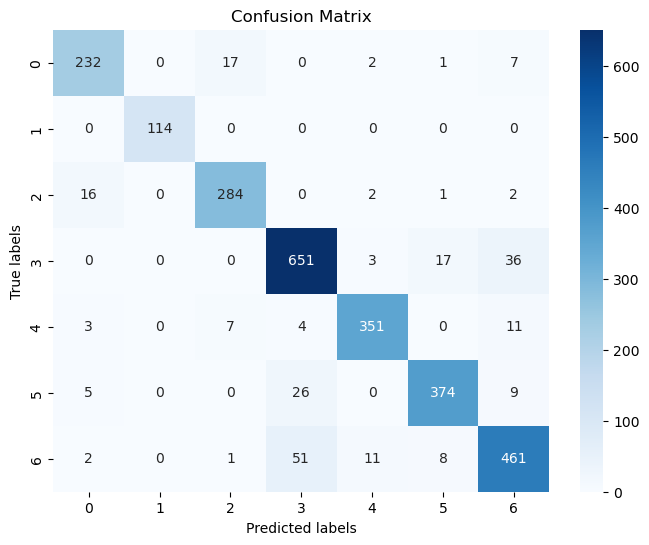

In [28]:
# how to obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels to the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Show the figure
plt.show()

#### Support Vector Machine

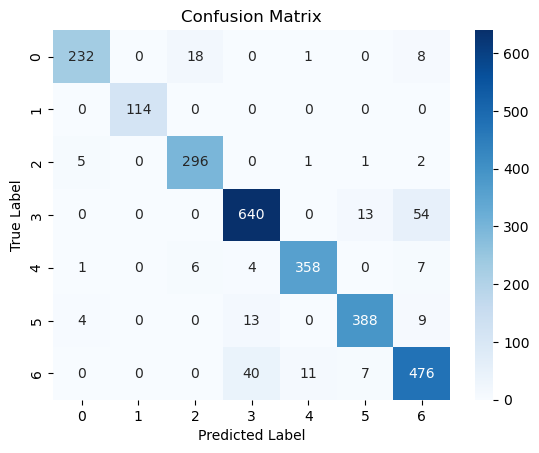

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       259
         1.0       1.00      1.00      1.00       114
         2.0       0.93      0.97      0.95       305
         3.0       0.92      0.91      0.91       707
         4.0       0.96      0.95      0.96       376
         5.0       0.95      0.94      0.94       414
         6.0       0.86      0.89      0.87       534

    accuracy                           0.92      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.92      0.92      2709



In [29]:
# Creating the SVM classifier object
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm = SVC()

# Training the classifier on the training data
svm.fit(X_train, y_train)

# Predicting on the test data
y_pred = svm.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Submission File GenerationSubmission File Generation

In [41]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating the SVM classifier object
svm = SVC()

# Training the classifier on the training data
svm.fit(X_train, y_train)

# Predicting on the test data
y_pred = svm.predict(X_test)

# Creating a DataFrame with IDs and predicted labels
results_df = pd.DataFrame({'Predicted Label': y_pred})

# Saving the results to a CSV file
results_df.to_csv('predicciones.csv', index=False)
